# Libraries and Data Cleaning

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

# reading datafile
df = pd.read_csv(r'HREmployeeAttrition.csv')

In [2]:
# checking all the data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [3]:
# checking the blank values in the data columns using pandas
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
# Checking the min, max, Average values to determine any outliers
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# dropping all the duplicate values
df.drop_duplicates()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Data Cleaning,Correlation and Decision Tree

In [6]:
correlationcolumns = df.select_dtypes(include=['int64']).columns
correlationdf = df[correlationcolumns]
correlation_matrix = correlationdf.corr()
correlation_matrix

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [7]:
high_corr = correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix != 1.0)].stack().reset_index()
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr

,Feature 1,Feature 2,Correlation
0,JobLevel,MonthlyIncome,0.950300
1,JobLevel,TotalWorkingYears,0.782208
2,MonthlyIncome,JobLevel,0.950300
3,MonthlyIncome,TotalWorkingYears,0.772893
4,PercentSalaryHike,PerformanceRating,0.773550
5,PerformanceRating,PercentSalaryHike,0.773550
6,TotalWorkingYears,JobLevel,0.782208
7,TotalWorkingYears,MonthlyIncome,0.772893
8,YearsAtCompany,YearsInCurrentRole,0.758754
9,YearsAtCompany,YearsWithCurrManager,0.769212


In [8]:
listofcol=[]
for i in high_corr['Feature 1']:
    listofcol.append(i)

for j in high_corr['Feature 2']:
    listofcol.append(j)

listofcol = list(set(listofcol))

listofcol

datacleaningdf=decisiontreedf=df[listofcol]

In [9]:
datacleaningdf.describe()

,PercentSalaryHike,MonthlyIncome,PerformanceRating,YearsAtCompany,JobLevel,YearsInCurrentRole,YearsWithCurrManager,TotalWorkingYears
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,15.209524,6502.931293,3.153741,7.008163,2.063946,4.229252,4.123129,11.279592
std,3.659938,4707.956783,0.360824,6.126525,1.106940,3.623137,3.568136,7.780782
min,11.000000,1009.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,12.000000,2911.000000,3.000000,3.000000,1.000000,2.000000,2.000000,6.000000
50%,14.000000,4919.000000,3.000000,5.000000,2.000000,3.000000,3.000000,10.000000
75%,18.000000,8379.000000,3.000000,9.000000,3.000000,7.000000,7.000000,15.000000
max,25.000000,19999.000000,4.000000,40.000000,5.000000,18.000000,17.000000,40.000000


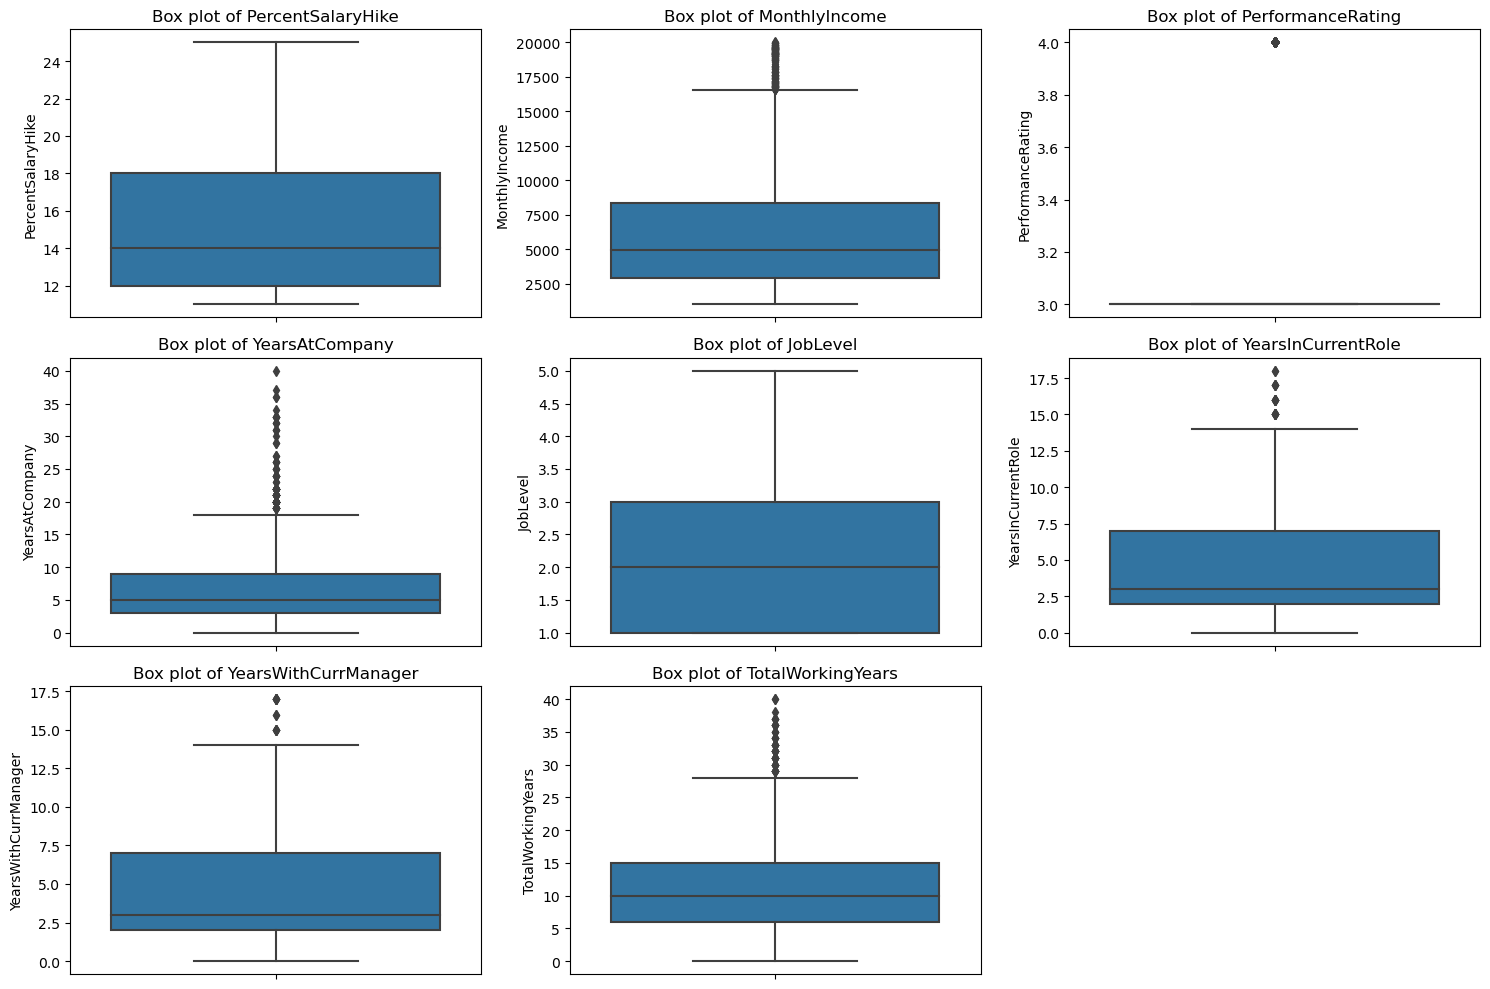

In [10]:
# Plotting box plots for visualizing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(listofcol):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=datacleaningdf[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [11]:
# Calculating ZScore inorder to see the outliers
ZScoredf = (datacleaningdf-datacleaningdf.mean())/datacleaningdf.std()
listofcleaningcolumns=['YearsAtCompany', 'MonthlyIncome', 'PercentSalaryHike','TotalWorkingYears', 'PerformanceRating', 'YearsInCurrentRole','JobLevel', 'YearsWithCurrManager']
for i in listofcleaningcolumns:
    for j in range(0,len(ZScoredf)):
        if ZScoredf[i][j] > 4 or ZScoredf[i][j] < -4:
            print(f'For the column name {i}, index number {j} this is outlier and its value is {datacleaningdf[i][j]}')

For the column name YearsAtCompany, index number 98 this is outlier and its value is 37
For the column name YearsAtCompany, index number 126 this is outlier and its value is 40
For the column name YearsAtCompany, index number 190 this is outlier and its value is 33
For the column name YearsAtCompany, index number 237 this is outlier and its value is 33
For the column name YearsAtCompany, index number 270 this is outlier and its value is 36
For the column name YearsAtCompany, index number 477 this is outlier and its value is 32
For the column name YearsAtCompany, index number 561 this is outlier and its value is 34
For the column name YearsAtCompany, index number 749 this is outlier and its value is 32
For the column name YearsAtCompany, index number 914 this is outlier and its value is 33
For the column name YearsAtCompany, index number 962 this is outlier and its value is 33
For the column name YearsAtCompany, index number 1086 this is outlier and its value is 32
For the column name Y

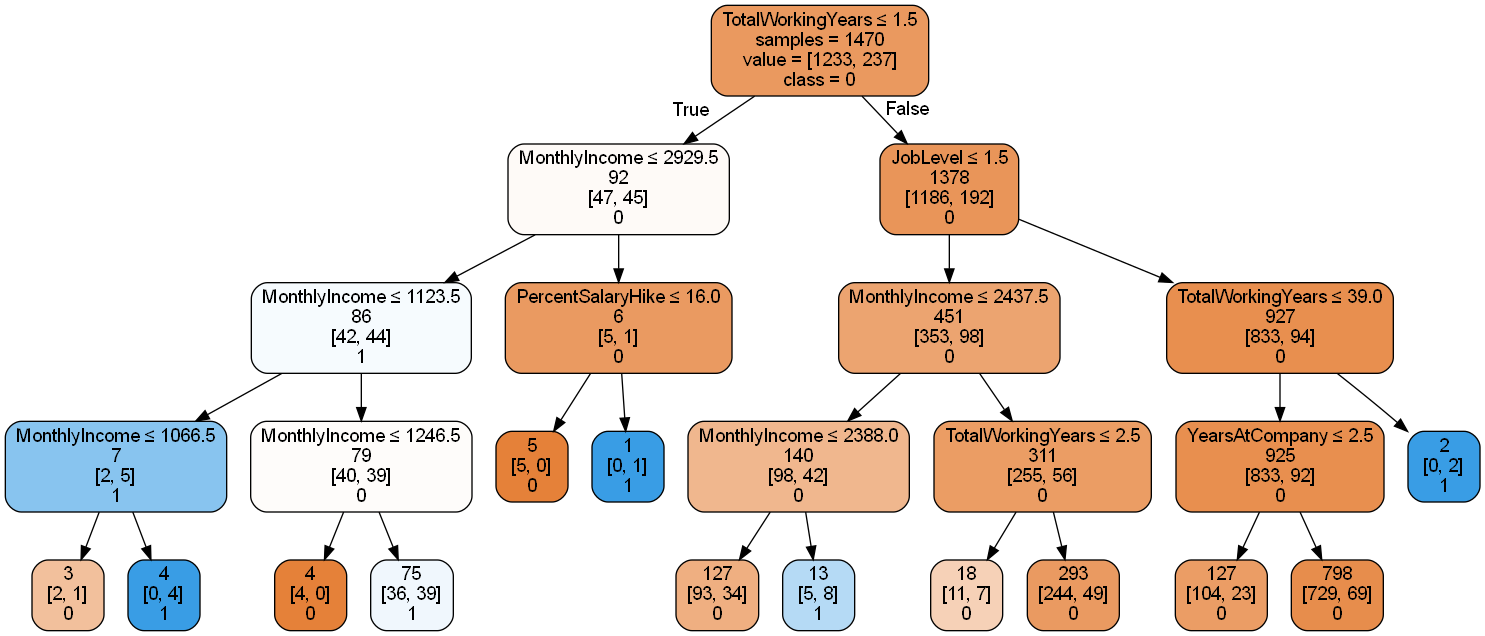

In [12]:
Attrition_New = []
for i in range(0,len(df)):
    if df['Attrition'][i]=='Yes':
        Attrition_New.append(1)
    else:
        Attrition_New.append(0)

Attrition_New = pd.Series(Attrition_New, name='Attrition_New')
data =  pd.concat([decisiontreedf,Attrition_New],axis=1)

# Preprocess the data
# Assuming 'target' is the column to predict
X = decisiontreedf
y = data['Attrition_New']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

datafinal = pd.DataFrame(data)


classTree = DecisionTreeClassifier(random_state=0, max_depth=4)
classTree.fit(datafinal.drop(columns=['Attrition_New']), datafinal['Attrition_New'])
plotDecisionTree(classTree, feature_names=datafinal.columns[:8], class_names=classTree.classes_)

# Naive Bayes

In [13]:
# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 0.7551020408163265
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       255
           1       0.23      0.36      0.28        39

    accuracy                           0.76       294
   macro avg       0.56      0.59      0.57       294
weighted avg       0.80      0.76      0.78       294

[[208  47]
 [ 25  14]]


# Polynomial Regression Clustering

In [14]:
# Apply Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE: ", train_rmse)
print("Testing RMSE: ", test_rmse)
print("Training R2: ", train_r2)
print("Testing R2: ", test_r2)

# Convert regression output to binary classification
y_pred_binary = np.where(y_test_pred >= 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

# Additional metrics
print(classification_report(y_test, y_pred_binary))

Training RMSE:  0.3565490756392605
Testing RMSE:  0.34017767437235086
Training R2:  0.09207656067686643
Testing R2:  -0.005776511093054104
Accuracy: 0.8673469387755102
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Assuming 'new_data' is the new data you want to predict
new_data = [[value1, value2, value3, ...]]  # Replace with actual feature values

# Transform new data using the same PolynomialFeatures transformer
new_data_poly = poly.transform(new_data)

# Make predictions on new data
new_data_pred = model.predict(new_data_poly)